In [149]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.simplefilter(action='ignore', category=FutureWarning)

# Regresión: Practica
### Data Science I
daortega@udec.cl

Dado un conjunto de datos $(X,Y)$, queremos determinar una función que permita predecir el valor de salida de nuevos datos. Cuando el valor que debe ser predicho es un número continuo, el problema es una regresión


In [2]:
import numpy as np
import pandas as pd
import utils
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import GridSearchCV
# seteamos una semilla para poder reproducir los experimentos
np.random.seed(42)

In [44]:
# utils.plot_grid_search_validation_curve(grid__digits, 'model__alpha', log=True, ylim=(.92, 1.02))

In [34]:
# Modelos
# Validacion Cruzada
# sampling
# Metricas: https://scikit-learn.org/stable/modules/model_evaluation.html

# Regresión Paramétrica

In [3]:
from sklearn.datasets.samples_generator import make_regression
n_samples = 1000
X, y = sklearn.datasets.make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                       random_state=0)
line_X = np.arange(X.min(),X.max())
line_X = line_X[:,np.newaxis]

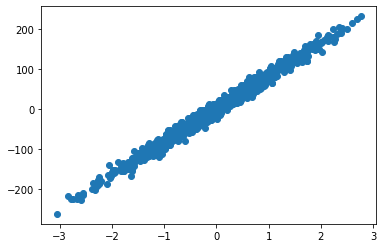

In [4]:
plt.scatter(X,y)

## Regresión linear

Documentación: https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares


In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(line_X)

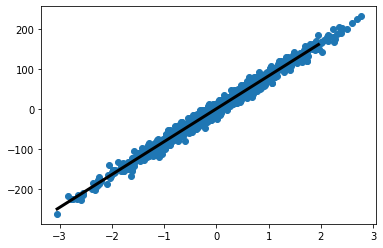

In [6]:
plt.figure()
plt.scatter(X,y)
plt.plot(line_X ,y_pred,color='black', linewidth=3)

## Regresión polinomial

Cuando los datos sobre los cuales queremos aplicar regresión no son lineales, podemos aplicar una transformacion a los datos, para poder realizar una regresión sobre estos.
Veamos que podemos hacer una regresion no lineal, con un modelo lineal, transformando las caracterisiticas a no lineales.



In [7]:
from sklearn.preprocessing import PolynomialFeatures

In [8]:
# n = 10000
# np.random.seed(0)
# X = 5 - 3 * np.random.normal(0, 1, n)
# # y = X - 2 * (X ** 2) + 0.5 * (X ** 3)  + np.random.normal(-5, 5, n)
# y = X - 7 * (X ** 2) +  (X ** 3) +  7*(X ** 4) - 4 * (X ** 7) + np.random.normal(-5, 5, n)


# X = X[:, np.newaxis]
# y = y[:, np.newaxis]
# plt.scatter(X,y, s=1)
# plt.show()
# line_X = np.linspace(X.max(),X.min())
# line_X = line_X[:, np.newaxis]

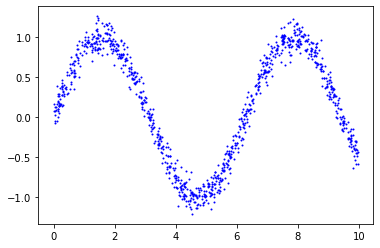

In [48]:
n=1000
rng = np.random.RandomState(1)
X = 10 * rng.rand(n)
y = np.sin(X) + 0.1 * rng.randn(n)
X = X[:, np.newaxis]
y = y[:, np.newaxis]




plt.scatter(X,y, s=1,color="blue")
plt.show()
line_X = np.linspace(X.max(),X.min())
line_X = line_X[:, np.newaxis]

In [49]:
from sklearn.pipeline import make_pipeline
#definimos un metodo para la regreesion polinomial
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(sklearn.preprocessing.PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

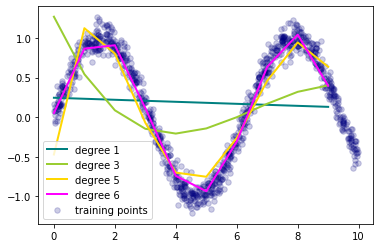

In [50]:
colors = ['teal', 'yellowgreen', 'gold','magenta','red','green']
plt.scatter(X, y, color='navy', s=30, marker='o',alpha=0.2, label="training points")
X_plot = np.arange(X.min(),X.max())
X_plot = X_plot[:, np.newaxis]
for count, degree in enumerate([1,3, 5,6]):
    model = PolynomialRegression(degree)
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(X_plot, y_plot, color=colors[count], linewidth=2,
             label="degree %d" % degree)
plt.legend()    

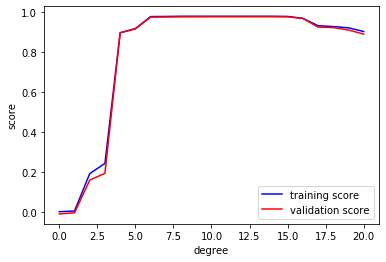

In [51]:
from sklearn.model_selection import validation_curve

degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree', degree, cv=7)
utils.plot_validation_curve(degree,train_score, val_score)

## Bias Variance Tradeoff

El error de generalizacion del modelo puede ser expresado como la suma de:

$Error = Sesgo² + varianza + error irreducible$

* **Sesgo**

Esta parte del error de generalización se debe a suposiciones erróneas.
Un modelo de alto sesgo no encaja con los datos de entrenamiento. 
Alto Sesgo -> Underfitting

* **Varianza**

Se debe a la excesiva sensibilidad del modelo a pequeñas variaciones en los datos de entrenamiento. 
Un modelo con un alto grado de polinomial es probable que tenga una alta varianza.
Alta Varianza -> Overfitting
* **Error irreducible**

Esta parte se debe al ruido de los propios datos. La única manera de reducir esto
parte del error es limpiar los datos (por ejemplo, arreglar las fuentes de datos, detectar y eliminar valores atípicos).

El aumento de la complejidad de un modelo normalmente aumenta su varianza y reduce su sesgo.
Por el contrario, la reducción de la complejidad de un modelo aumenta su sesgo y reduce su varianza.
Esta es la razón por la que se le llama una compensación.




# Regularización

Una forma de reducir el sobreajuste es regularizar(limitar) el modelo.


## Ridge

Documentación: https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression

Regresión de Ridge, es una versión regularizada de regresion lineal, en este caso se le añade el termino regularizador  $\alpha \sum_{i=1}^{n} \theta_{i}^{2}$.
Añadir un termino regularizador es equivalente a añadir sesgo a cambio de disminuir la varianza.    
    
Esto obliga al algoritmo no sólo a ajustar los datos sino también a mantener el modelo pesos tan pequeños como sea posible. El hiperparámetro $\alpha$ controla cuánto se desea regularizar el modelo. 
- Si $\alpha = 0$ entonces se comportara como una Regresión Lineal. 
- Si $\alpha$ es muy grande, entonces todos los pesos terminan muy cerca de cero y el resultado seria una línea plana que atraviesa la media de los datos.


Cuando usar: Si tenemos menos de 1000 muestras o se tiene una mayor cantidad de parametros que de muestras.

In [ ]:
degree = 6
poly = PolynomialFeatures(degree)
X_ = poly.fit_transform(X)

X_plot_ = poly.fit_transform(X_plot)

In [62]:
from sklearn.linear_model import Ridge


rr = Ridge(alpha=0.01) 
rr_50 = Ridge(alpha=50) 

rr.fit(X_, y)
rr_50.fit(X_, y)

rr_pred = rr.predict(X_plot_)
rr_50_pred = rr_50.predict(X_plot_)

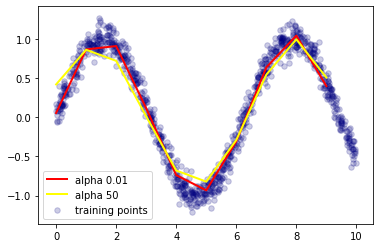

In [63]:
plt.plot(X_plot, rr_pred,color = "red", linewidth=2,label = "alpha 0.01")
plt.plot(X_plot, rr_50_pred,color = "yellow", linewidth=2,label = "alpha 50")
plt.scatter(X, y, color='navy', s=30, marker='o',alpha=0.2, label="training points")

plt.legend()

## Lasso Regresion

Documentación: https://scikit-learn.org/stable/modules/linear_model.html#lasso


Lasso es que tiende a eliminar completamente los pesos de caracteristicas menos importantes. Además realiza automáticamente la selección de características y produce un modelo con pocos pesos que no sean cero.
Lasso puede excluir caractericticas de ecuaciones llevandolas a 0, por lo ucal es un poco mejor que Ridge para reducir la varianza de los modelos, que contienen caracteristicas irrelevantes.


In [150]:
from sklearn.linear_model import Lasso


lr = Lasso(alpha=0.01) 
lr_50 = Lasso(alpha=50) 

lr.fit(X_, y)
lr_50.fit(X_, y)

lr_pred = lr.predict(X_plot_)
lr_50_pred = lr_50.predict(X_plot_)

/home/daniel/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


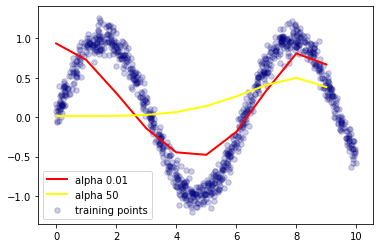

In [151]:
plt.plot(X_plot, lr_pred,color = "red", linewidth=2,label = "alpha 0.01")
plt.plot(X_plot, lr_50_pred,color = "yellow", linewidth=2,label = "alpha 50")
plt.scatter(X, y, color='navy', s=30, marker='o',alpha=0.2, label="training points")
plt.legend()

## Regresión sobre conjunto de datos real

In [152]:
# conjunto de datos
from sklearn.datasets import load_boston
# escalar y dividir el conjunto de datos
from sklearn import preprocessing
#dividir dataset
from sklearn.model_selection import train_test_split
# Metricas evaluación
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [153]:
# Cargamos el dataset
house_price = load_boston()
df = pd.DataFrame(house_price.data, columns=house_price.feature_names)
df['PRICE'] = house_price.target
print(house_price.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Como buscar el mejor modelo?

Usar validacion Cruzada (https://scikit-learn.org/stable/modules/cross_validation.html)

# conjunto de datos
Para realizar validacion cruzada, debemos dividir nuestro conjunto de entrenamiento

**Conjunto de entrenamiento:** Usar para entrenar el modelo.

**Conjunto de validación:** Es un conjunto de datos distinto al conjunto de entrenamiento. Podemos scar un porcentaje de nuestro conjunto de entrenamiento para usarlo como conjunto de validación. El conjunto de validación indica el rendimiento del modelo en el entrenamiento. Con él se puede ajustar los hiperparámetros de los modelos.

**Conjunto de prueba**: Conjunto de datos distinto al de entrenamiento y al de validación, sobre el cual evaluaremos el modelo.


In [154]:
# estandarizamos los datos
house_price.data = preprocessing.scale(house_price.data)
#dividimos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    house_price.data, house_price.target, test_size=0.3, random_state=10)

In [155]:
ols_reg = LinearRegression()
ols_reg.fit(X_train, y_train)
lin_pred = ols_reg.predict(X_test)
coeficientes = pd.DataFrame({'variable': house_price.feature_names, 'b lineal': ols_reg.coef_,})
# 'a lineal': ols_reg.intercept_,

In [156]:
from sklearn.linear_model import RidgeCV

In [157]:
# forma1
alphas=np.arange(0.01, 10, 0.01)
ridgeCV_reg = RidgeCV(alphas=alphas,normalize=True,scoring= 'r2', cv = 5)
ridgeCV_reg.fit(X_train, y_train)
ridge_pred = ridgeCV_reg.predict(X_test)
# coeficientes["a ridge"] = ridgeCV_reg.intercept_
coeficientes["b ridge"] = ridgeCV_reg.coef_

In [158]:
# forma2
#Queremos saber los parametros que podemos usar en la busqueda
Ridge().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [159]:
params = {"alpha":alphas,}
cv=GridSearchCV(Ridge(),params, scoring=['neg_mean_squared_error', 'r2'],  refit='r2',cv=5, n_jobs = -1,verbose = 2)
# cv=GridSearchCV(Ridge(),params, scoring='r2',cv=5, n_jobs = -1,verbose = 2)
cv.fit(X_train,y_train)

Fitting 5 folds for each of 999 candidates, totalling 4995 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1196 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 4995 out of 4995 | elapsed:    4.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': array([0.01, 0.02, ..., 9.98, 9.99])},
       pre_dispatch='2*n_jobs', refit='r2', return_train_score='warn',
       scoring=['neg_mean_squared_error', 'r2'], verbose=2)

In [160]:
ridge_reg = cv.best_estimator_
ridge_pred_cv = ridge_reg.predict(X_test)

In [161]:
ridge_reg

Ridge(alpha=2.67, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [162]:
print("RidgeCV : ","R-squared:", round(r2_score(y_test, ridge_pred), 4),"alpha: ",ridgeCV_reg.alpha_)
print("Ridge : ","R-squared:", round(r2_score(y_test, ridge_pred_cv), 4),"alpha: ",ridge_reg.alpha)

RidgeCV :  R-squared: 0.7002 alpha:  0.01
Ridge :  R-squared: 0.7001 alpha:  2.67


In [163]:
from sklearn.linear_model import LassoCV
alphas=np.arange(0.01, 5, 0.011)
# print(alphas)
LassoCV_reg = LassoCV(alphas=alphas,cv = 5)
LassoCV_reg.fit(X_train, y_train)
lasso_pred = LassoCV_reg.predict(X_test)
# coeficientes["a lasso"] = LassoCV_reg.intercept_
coeficientes["b lasso"] = LassoCV_reg.coef_

In [164]:
coeficientes

,variable,b lineal,b ridge,b lasso
0,CRIM,-1.321404,-1.270282,-1.287770
1,ZN,1.514832,1.434034,1.475808
2,INDUS,-0.166266,-0.230842,-0.168792
3,CHAS,0.411579,0.428664,0.408832
4,NOX,-1.771168,-1.647956,-1.706219
5,RM,2.352821,2.407811,2.377087
6,AGE,0.318499,0.273975,0.269956
7,DIS,-3.256645,-3.105694,-3.196741
8,RAD,2.632576,2.323401,2.489278
9,TAX,-2.059466,-1.781730,-1.945664


Si consideramos la regresion $y = a +bx$

* Coeficientes (b)

     Si X es un dato continuo: una unidad de incremento en x, producto b incrementos en y. 
     
     Si X es un dato categorico: consideremos 2 clases 0 y 1. En promedio y es mayor por b unidades para 1.

In [165]:
print("Linear: ","R-squared:", round(r2_score(y_test, lin_pred), 4))
print("Ridge : ","R-squared:", round(r2_score(y_test, ridge_pred), 4),"alpha: ",ridgeCV_reg.alpha_)
print("Lasso: ","R-squared:", round(r2_score(y_test, lasso_pred), 4),"alpha: ",LassoCV_reg.alpha_)

Linear:  R-squared: 0.6996
Ridge :  R-squared: 0.7002 alpha:  0.01
Lasso:  R-squared: 0.7003 alpha:  0.01


# Regresión No Paramétrica

- Los modelos no paramétricos no hacen ninguna suposición con respecto a la distribución de los datos.
- La complejidad de los modelos no paramétricos crece en relación con el tamaño de los datos. 

## Cuando escoger modelo no paramétrico:

- Espacios de característica desconocidos o indeterminados. Los regresores del núcleo (incluyendo los procesos gaussianos) contienen la maquinaria para manejar un número infinito de dimensiones.

- Los datos subyacentes existentes violan muchas de las suposiciones básicas dentro de los modelos paramétricos (datos distribuidos independientemente, media uniforme y varianza de los residuales distribuidos por Gauss para el modelo OLS)

- modelos paramétricos a menudo dependen de una función de objetivo y coste - dos de los más populares para la regresión son el error medio absoluto (MAE) y el error medio cuadrado (MSE). Estas funciones pueden verse gravemente afectadas por los valores atípicos, y si la complejidad del modelo es alta, el modelo puede "perseguir" los valores atípicos y sobredimensionar los datos.


### K-NN Regression : 

Documentación: https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-regression
### Regression trees
Para modelos basados en árboles, podemos usar el atributo feature_importances para conocer la importancia de cada variable a la hora de hacer una partición (partir un nodo en subnodos).

Documentación: https://scikit-learn.org/stable/modules/tree.html
### Random Forest
Documentación: https://scikit-learn.org/stable/modules/ensemble.html


In [111]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.ensemble.forest import RandomForestRegressor

In [234]:
ESTIMATORS = {
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
    "Lasso": LassoCV(),
    "tree":tree.DecisionTreeRegressor(),
    "RF trees": RandomForestRegressor(),
}

r2_scores = pd.DataFrame({'Model': list(ESTIMATORS.keys())})
r2 = []
y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)
    r2.append(r2_score(y_test, y_test_predict[name]))
r2_scores["score"] = r2

Para modelos basados en árboles, podemos usar el atributo feature_importances para conocer la importancia de cada variable a la hora de hacer una partición (partir un nodo en subnodos).

In [239]:
importancia = pd.DataFrame({'variable': house_price.feature_names, 'tree': ESTIMATORS["tree"].feature_importances_})
importancia["RF trees"] = ESTIMATORS["RF trees"].feature_importances_

In [240]:
importancia

,variable,tree,RF trees
0,CRIM,0.062383,0.022640
1,ZN,0.000194,0.000689
2,INDUS,0.008245,0.005575
3,CHAS,0.000097,0.000860
4,NOX,0.014686,0.016802
5,RM,0.550272,0.294574
6,AGE,0.008088,0.013304
7,DIS,0.085597,0.065193
8,RAD,0.002290,0.007071
9,TAX,0.004400,0.016178


In [241]:
r2_scores.sort_values(by=['score'])

,Model,score
1,Linear regression,0.699626
2,Ridge,0.699833
3,Lasso,0.700803
0,K-nn,0.701840
4,tree,0.821981
5,RF trees,0.881779


Realicemos validacion cruzada sobre el mejor modelo

In [272]:
tree.DecisionTreeRegressor().get_params

<bound method BaseEstimator.get_params of DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')>

In [269]:

leaf_size = np.linspace(1,30,1)
n_neighbors = np.arange(1,10,1)
params = {"leaf_size":leaf_size,"n_neighbors" : n_neighbors}

cv=GridSearchCV(KNeighborsRegressor(),params, scoring='r2',cv=5, n_jobs = -1,verbose = 2)
cv.fit(X_train,y_train)
knn = cv.best_estimator_
knn_pred = knn.predict(X_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.5s finished


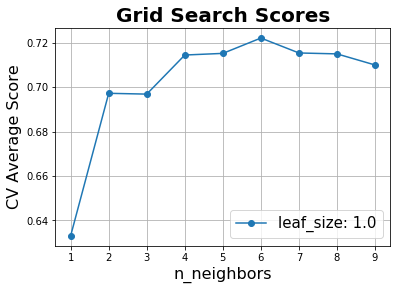

In [271]:
utils.plot_grid_search(cv.cv_results_ ,  n_neighbors,leaf_size,  "n_neighbors","leaf_size",)

In [242]:
RandomForestRegressor().get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [250]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [258]:
from sklearn.model_selection import RandomizedSearchCV

In [260]:
grid_search = RandomizedSearchCV(RandomForestRegressor(), 
                           random_grid,
                           scoring='r2',
                           cv=3, 
                           n_jobs = -1,
                           verbose = 2)

In [261]:
grid_search.fit(X_train,y_train)
rf = grid_search.best_estimator_
y_pred = rf.predict(X_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   15.0s finished


In [1]:
# from sklearn.externals import joblib
# joblib.dump(rf, 'random_forest.pkl') 

In [264]:
rf = joblib.load('random_forest.pkl') 

In [ ]:
rf

In [ ]:
y_pred = rf.predict(X_test)

In [262]:
r2_score(y_test, y_pred),utils.mean_absolute_percentage_error(y_test,y_pred)

(0.8613664178620055, 10.080158420769292)

## Procesos Gaussianos
Documentación: https://scikit-learn.org/stable/modules/gaussian_process.html#gaussian-process-regression-gpr


In [265]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RationalQuadratic, WhiteKernel,RBF,PairwiseKernel,Matern,ExpSineSquared,ConstantKernel
GaussianProcessRegressor().get_params()

{'alpha': 1e-10,
 'copy_X_train': True,
 'kernel': None,
 'n_restarts_optimizer': 0,
 'normalize_y': False,
 'optimizer': 'fmin_l_bfgs_b',
 'random_state': None}

In [223]:
ker_rbf = ConstantKernel(1.0, constant_value_bounds="fixed") * RBF(1.0, length_scale_bounds="fixed")
ker_rq = ConstantKernel(1.0, constant_value_bounds="fixed") * RationalQuadratic(alpha=0.1, length_scale=1)
ker_expsine = ConstantKernel(1.0, constant_value_bounds="fixed") * ExpSineSquared(1.0, 5.0, periodicity_bounds=(1e-2, 1e1))

kernel_list = [ker_rbf, ker_rq, ker_expsine]
param_grid = {"kernel": kernel_list,
              "alpha": [1e1,1e2,1e3,1e5],
              "optimizer": ["fmin_l_bfgs_b"],
              "n_restarts_optimizer": [1, 2, 3],
              "normalize_y": [True,False],
              "copy_X_train": [True,False], 
              "random_state": [0]}

In [224]:
gpr = GaussianProcessRegressor()
grid_search = GridSearchCV(gpr, param_grid=param_grid,scoring='r2',cv=5, n_jobs = -1,verbose = 2)
grid_search.fit(X_train, y_train)
gpr = grid_search.best_estimator_
gpr_pred = gpr.predict(X_test)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 297 tasks      | elapsed:   46.0s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  1.3min finished


In [227]:
gpr 

GaussianProcessRegressor(alpha=10.0, copy_X_train=True,
             kernel=1**2 * RationalQuadratic(alpha=0.1, length_scale=1),
             n_restarts_optimizer=2, normalize_y=True,
             optimizer='fmin_l_bfgs_b', random_state=0)

In [233]:
print("Gaussian Process: ","R-squared:", round(r2_score(y_test, gpr_pred), 4))

Gaussian Process:  R-squared: 0.5927
